In [1]:
!pip install opencv-python

In [2]:
!pip install matplotlib

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img = cv2.imread('./lena.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Transformada Rápida de Fourier

In [5]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

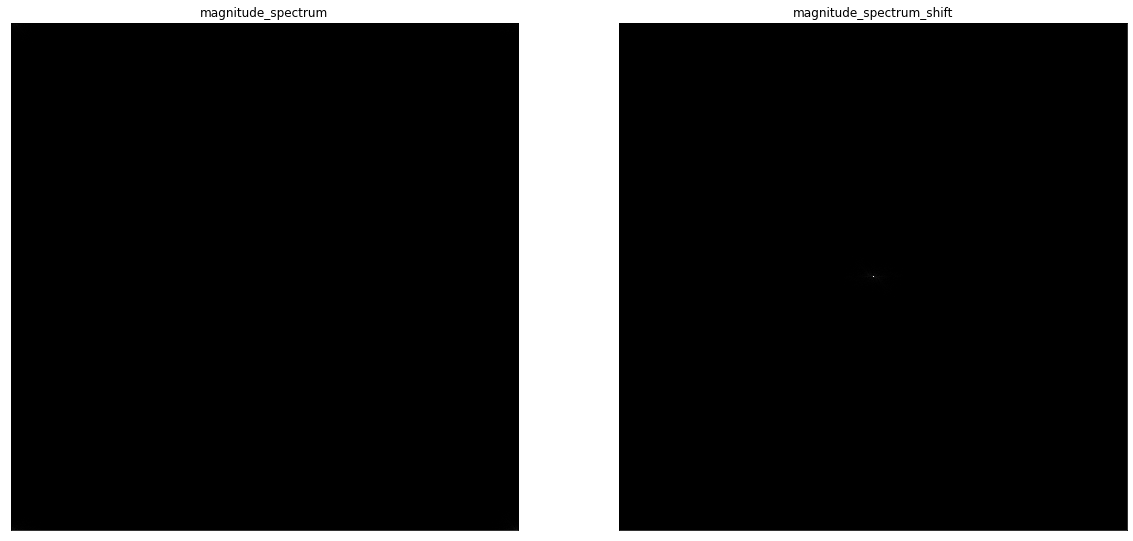

In [6]:
plt.figure(figsize=(20, 12))
plt.subplot(121),plt.imshow(np.abs(f), cmap = 'gray')
plt.title('magnitude_spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(np.abs(fshift), cmap = 'gray')
plt.title('magnitude_spectrum_shift'), plt.xticks([]), plt.yticks([])
plt.show()

In [7]:
real = np.real(f)
real_shift = np.real(fshift)

imaginary = np.imag(f)
imaginary_shift = np.imag(fshift)

## Sem o shift

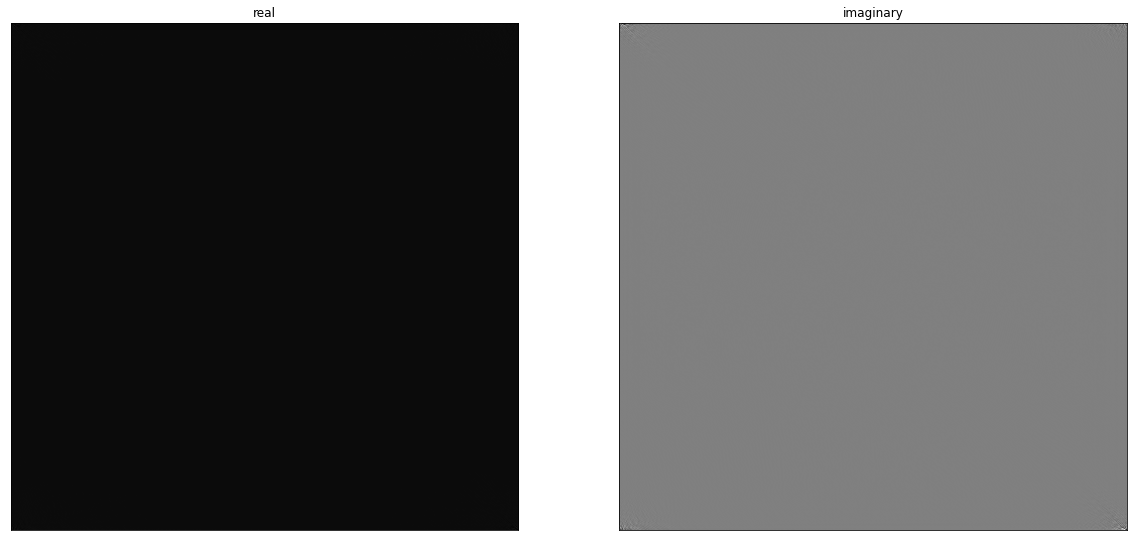

In [8]:
# R e Im

'''
plt.figure(figsize=(20, 12))
plt.subplot(121),plt.imshow(np.abs(dft[:, :, 0]), cmap = 'gray')
plt.title('part 1'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(np.abs(dft[:, :, 1]), cmap = 'gray')
plt.title('part 2'), plt.xticks([]), plt.yticks([])
'''

plt.figure(figsize=(20, 12))
plt.subplot(121),plt.imshow(real, cmap = 'gray')
plt.title('real'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(imaginary, cmap = 'gray')
plt.title('imaginary'), plt.xticks([]), plt.yticks([])

plt.show()

# Com o shift

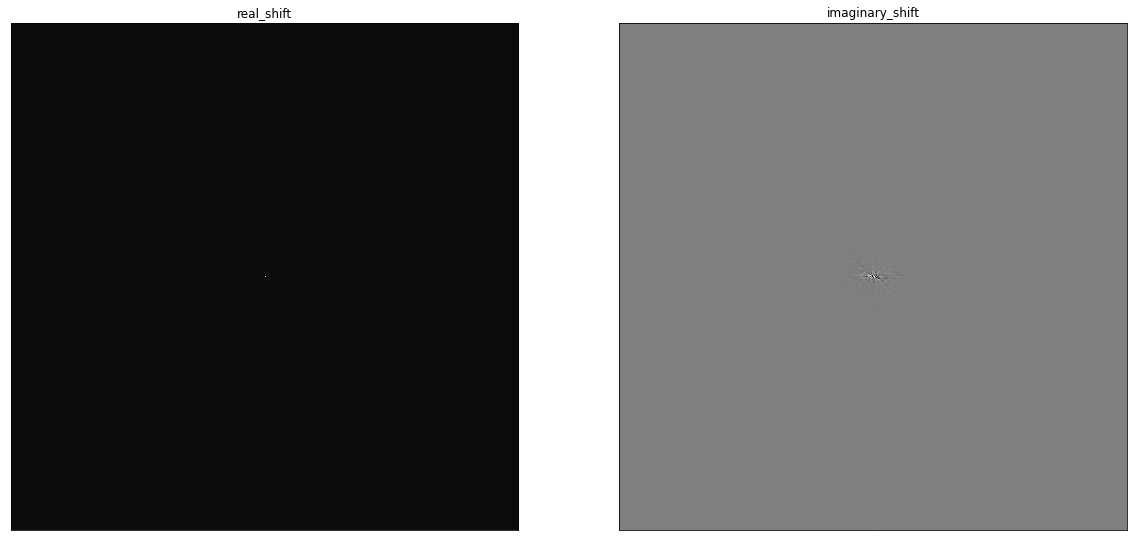

In [9]:
# R e Im
plt.figure(figsize=(20, 12))
plt.subplot(121),plt.imshow(real_shift, cmap = 'gray')
plt.title('real_shift'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(imaginary_shift, cmap = 'gray')
plt.title('imaginary_shift'), plt.xticks([]), plt.yticks([])
plt.show()

# Escalonamento

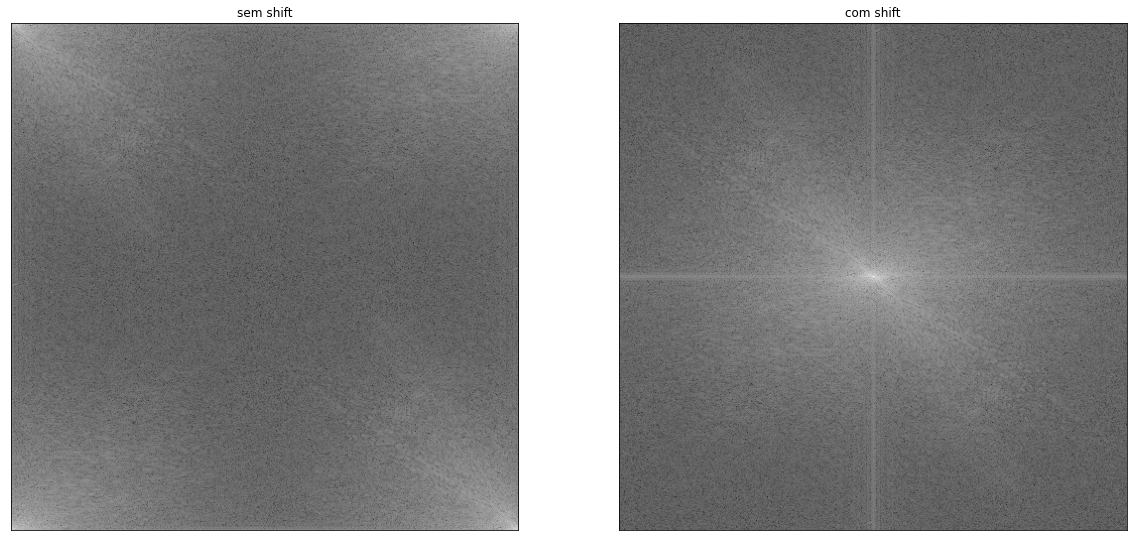

In [10]:
# 20 * np.log(np.abs(f))

plt.figure(figsize=(20, 12))
plt.subplot(121),plt.imshow(20*np.log(np.abs(f)), cmap = 'gray')
plt.title('sem shift'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(20*np.log(np.abs(fshift)), cmap = 'gray')
plt.title('com shift'), plt.xticks([]), plt.yticks([])
plt.show()

# Filtro passa-baixas frequências

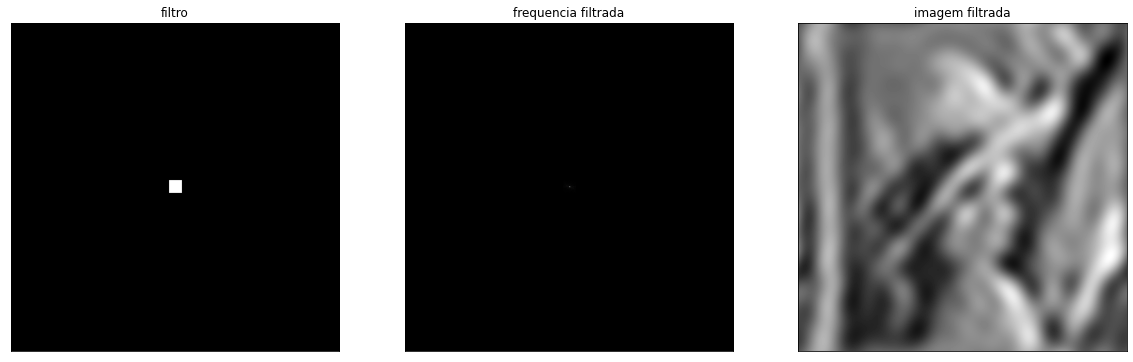

In [11]:
filtro = np.zeros(img.shape[:2], np.uint8)
cY, cX = img.shape[0] // 2, img.shape[1] // 2
corte = 10
filtro[cY - corte:cY + corte, cX - corte:cX + corte] = 1

'''
filtro = np.full(img.shape[:2], 0)
h, w = img.shape[:2]
cv2.circle(filtro, (w // 2, h // 2), 50, 255, 10)
'''

fshift_filtrada = fshift * filtro

fft_inversa = np.fft.ifftshift(fshift_filtrada)
imagem_filtrada = np.abs(np.fft.ifft2(fft_inversa))
#imagem_filtrada = np.uint8(imagem_filtrada)

plt.figure(figsize=(20, 12))
plt.subplot(131),plt.imshow(filtro, cmap = 'gray')
plt.title('filtro'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(np.abs(fshift_filtrada), cmap = 'gray')
plt.title('frequencia filtrada'), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(imagem_filtrada, cmap = 'gray')
plt.title('imagem filtrada'), plt.xticks([]), plt.yticks([])
plt.show()

# Filtro passa-altas frequências

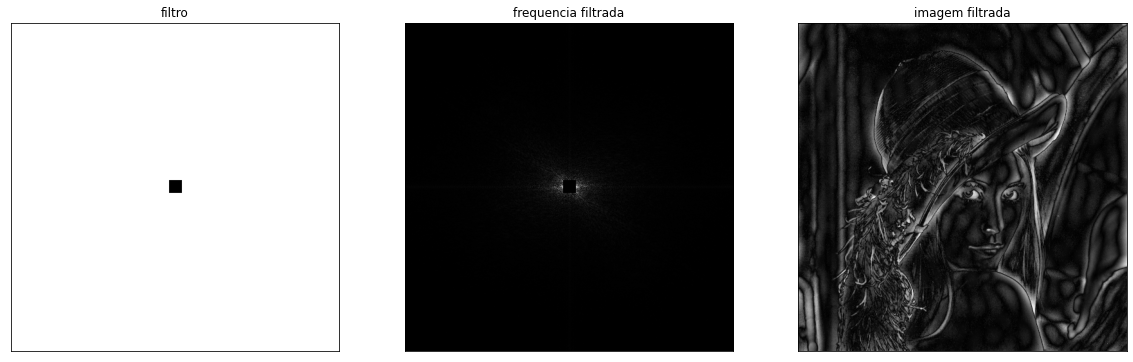

In [12]:
filtro = np.full(img.shape[:2], 1, np.uint8)
cY, cX = img.shape[0] // 2, img.shape[1] // 2
corte = 10
filtro[cY - corte:cY + corte, cX - corte:cX + corte] = 0

'''
filtro = np.full(img.shape[:2], 255)
h, w = img.shape[:2]
cv2.circle(filtro, (w // 2, h // 2), 50, 0, 10)
'''

fshift_filtrada = fshift * filtro

fft_inversa = np.fft.ifftshift(fshift_filtrada)
imagem_filtrada = np.abs(np.fft.ifft2(fft_inversa))
#imagem_filtrada = np.uint8(imagem_filtrada)

plt.figure(figsize=(20, 12))
plt.subplot(131),plt.imshow(filtro, cmap = 'gray')
plt.title('filtro'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(np.abs(fshift_filtrada), cmap = 'gray')
plt.title('frequencia filtrada'), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(imagem_filtrada, cmap = 'gray')
plt.title('imagem filtrada'), plt.xticks([]), plt.yticks([])
plt.show()

# Fourier (OpenCV)

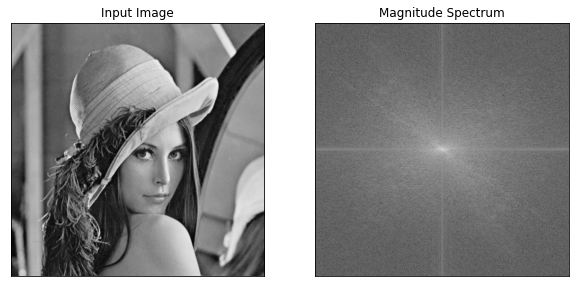

In [13]:
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

plt.figure(figsize=(10, 6))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.show()

# Fourier (Numpy)

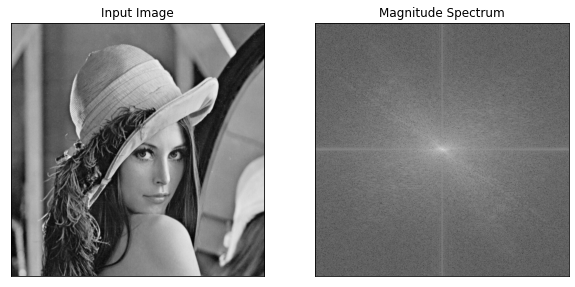

In [14]:
plt.figure(figsize=(10, 6))

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()